Dataset cargado exitosamente.
Error al procesar la columna 'Digital_encuesta': Can only use .str accessor with string values!

Columnas numéricas seleccionadas: ['Edad', 'Ingresos anuales brutos', 'Dias_cliente', 'Gasto_medio_mensual_cuota', 'Genero', 'Profesion', 'Experiencia laboral', 'Gastoscore', 'Family_Size', 'Generacion', 'Provincia', 'Digital_encuesta', 'Abandono']

Valores faltantes por columna:
Edad                         0
Ingresos anuales brutos      0
Dias_cliente                 0
Gasto_medio_mensual_cuota    0
Genero                       0
Profesion                    0
Experiencia laboral          0
Gastoscore                   0
Family_Size                  0
Generacion                   0
Provincia                    0
Digital_encuesta             0
Abandono                     0
dtype: int64

Número de filas después de eliminar valores faltantes: 10806

Datos estandarizados:
       Edad  Ingresos anuales brutos  Dias_cliente  Gasto_medio_mensual_cuota  \
0 -1.29781

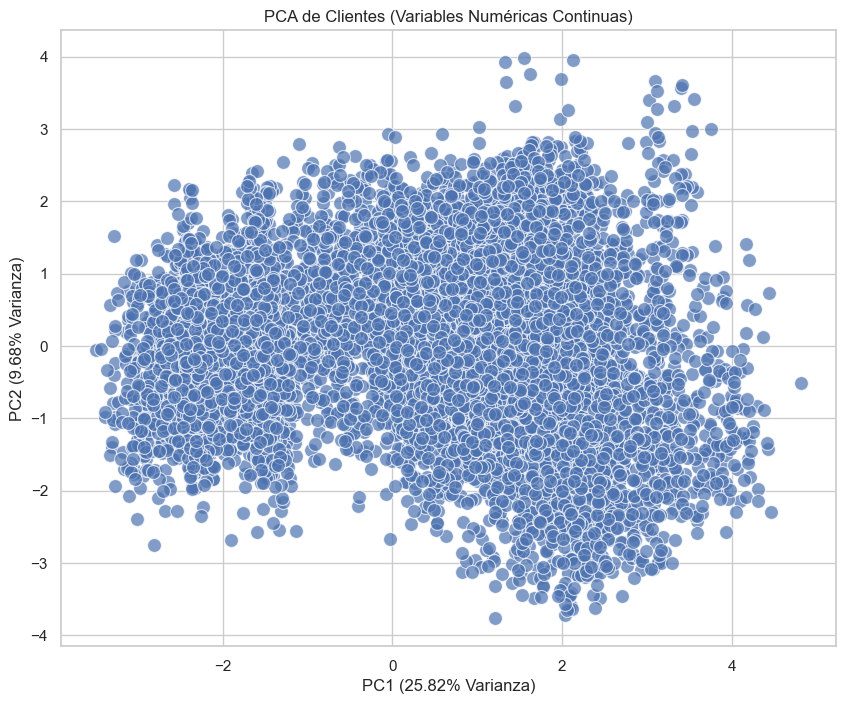

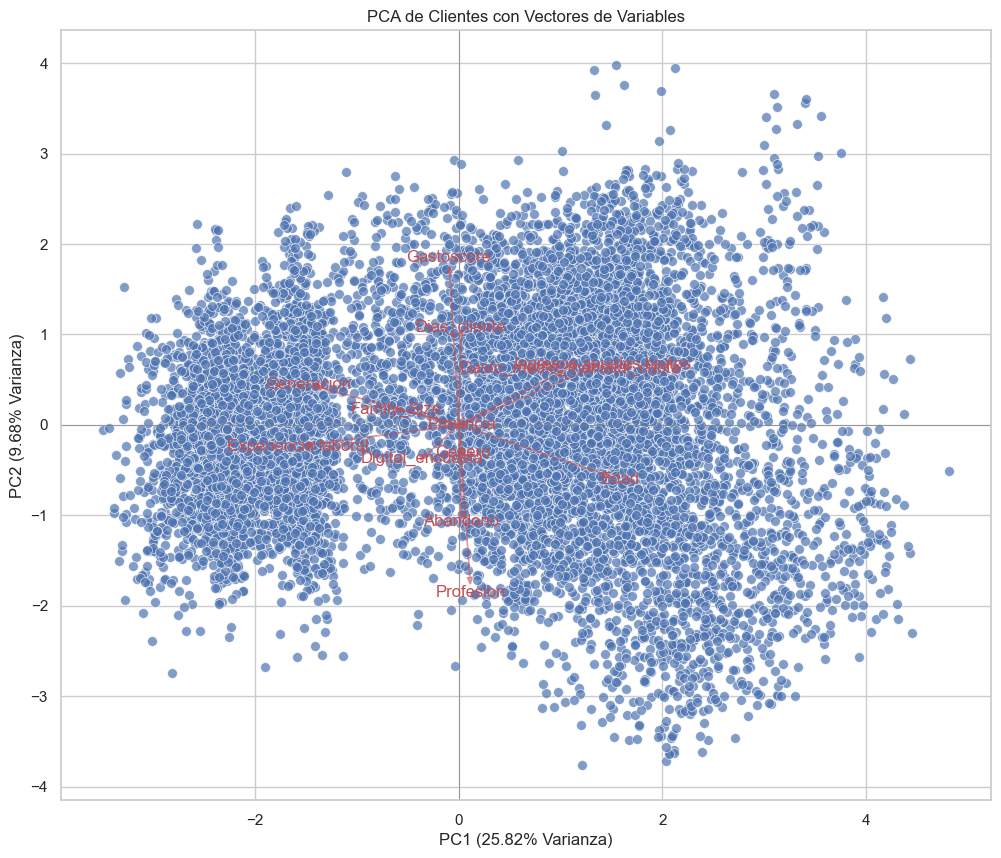


Cargas en las componentes principales:
                                PC1       PC2
Edad                       0.479018 -0.183073
Ingresos anuales brutos    0.427584  0.203442
Dias_cliente               0.008048  0.327358
Gasto_medio_mensual_cuota  0.328974  0.189764
Genero                     0.011636 -0.090718
Profesion                  0.036431 -0.562190
Experiencia laboral       -0.478669 -0.072323
Gastoscore                -0.028756  0.560607
Family_Size               -0.185732  0.053037
Generacion                -0.449019  0.136143
Provincia                  0.009854  0.002424
Digital_encuesta          -0.108341 -0.112560
Abandono                   0.007914 -0.322646


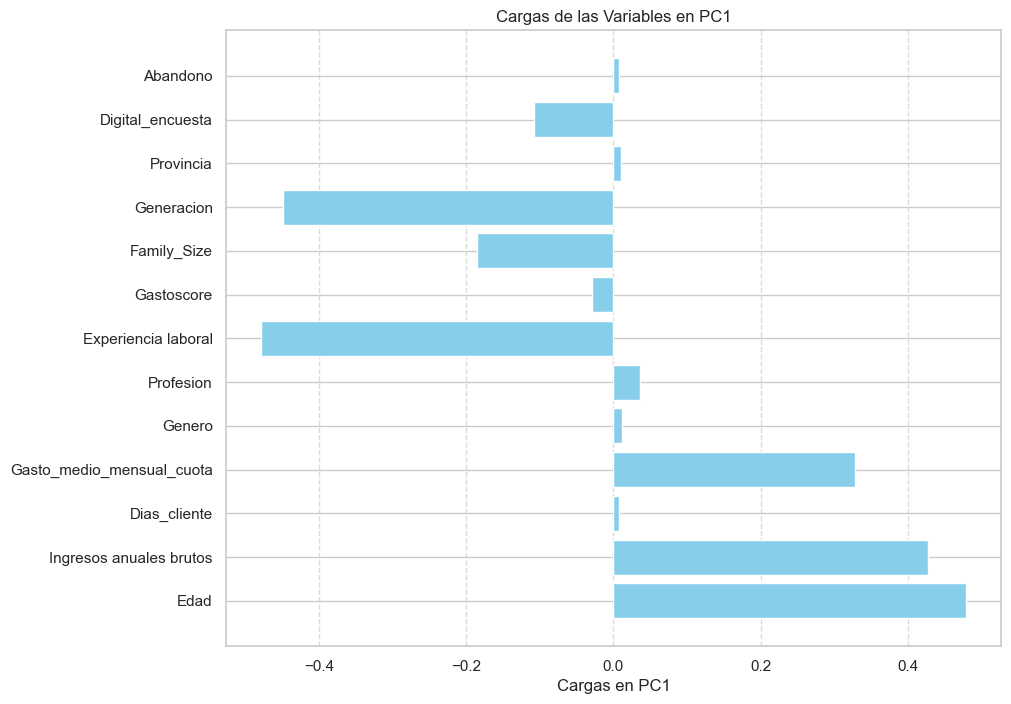

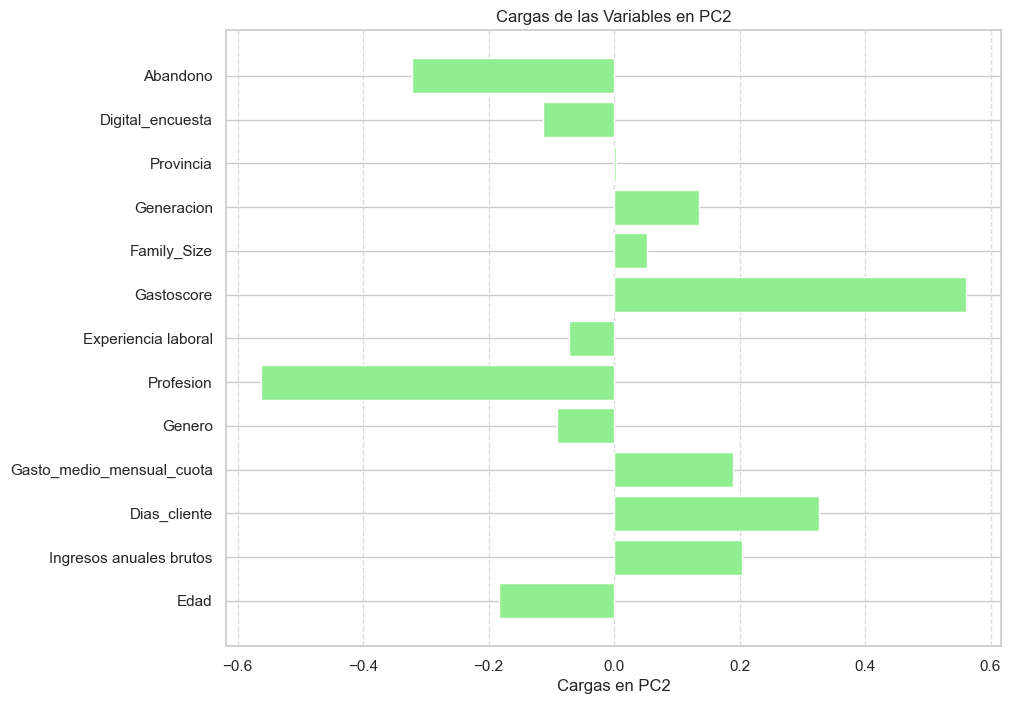

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Configurar estilos para las visualizaciones
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# 1. Cargar el dataset
file_path = 'Bueno_limpionumerico2.csv'  # Cambia por la ruta de tu archivo
df = pd.read_csv(file_path, delimiter=";")
print("Dataset cargado exitosamente.")

# Identificar las columnas numéricas con comas decimales
columnas_con_coma = ["Digital_encuesta"]

# Convertir las comas decimales a puntos
for columna in columnas_con_coma:
    try:
        if columna in df.columns:
            # Reemplazar comas por puntos y convertir a float
            df[columna] = df[columna].str.replace(",", ".").str.strip()
            df[columna] = pd.to_numeric(df[columna], errors="coerce")  # Convertir a número
            print(f"Columna '{columna}' convertida correctamente.")
        else:
            print(f"Advertencia: la columna '{columna}' no existe en los datos.")
    except Exception as e:
        print(f"Error al procesar la columna '{columna}': {e}")
        
# 2. Seleccionar columnas numéricas
numerical_cols = ['Edad', 'Ingresos anuales brutos', 'Dias_cliente', 
                     'Gasto_medio_mensual_cuota', 'Genero', 'Profesion', 
                     'Experiencia laboral', 'Gastoscore', 'Family_Size', 
                     'Generacion', 'Provincia', 'Digital_encuesta', 'Abandono']
print("\nColumnas numéricas seleccionadas:", numerical_cols)


# 3. Manejo de valores faltantes
print("\nValores faltantes por columna:")
print(df[numerical_cols].isnull().sum())

# Eliminar filas con valores faltantes en las columnas numéricas
df_cleaned = df[numerical_cols].dropna()
print(f"\nNúmero de filas después de eliminar valores faltantes: {df_cleaned.shape[0]}")

# 4. Estandarizar las variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cleaned)

df_scaled = pd.DataFrame(X_scaled, columns=numerical_cols)
print("\nDatos estandarizados:")
print(df_scaled.head())

# 5. Aplicar PCA
n_components = 2  # Elegimos reducir a 2 dimensiones
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components+1)])
print("\nComponentes principales:")
print(pca_df.head())

# 6. Varianza explicada
varianza_explicada = pca.explained_variance_ratio_
for i, var in enumerate(varianza_explicada, start=1):
    print(f"PC{i}: {var*100:.2f}%")

# 7. Visualización: Scatter Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, s=100, alpha=0.7)
plt.title('PCA de Clientes (Variables Numéricas Continuas)')
plt.xlabel(f'PC1 ({varianza_explicada[0]*100:.2f}% Varianza)')
plt.ylabel(f'PC2 ({varianza_explicada[1]*100:.2f}% Varianza)')
plt.grid(True)
plt.show()

# 8. Visualización: Biplot Mejorado
cargas = pca.components_.T
escalamiento = 3  # Ajusta según tus datos
cargas_scaled = cargas * escalamiento

plt.figure(figsize=(12, 10))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, s=50, alpha=0.7)

# Dibujar vectores de las variables
for i, var in enumerate(numerical_cols):
    plt.arrow(0, 0, cargas_scaled[i, 0], cargas_scaled[i, 1], 
              color='r', alpha=0.5, head_width=0.05)
    plt.text(cargas_scaled[i, 0]*1.1, cargas_scaled[i, 1]*1.1, 
             var, color='r', ha='center', va='center')

plt.title('PCA de Clientes con Vectores de Variables')
plt.xlabel(f'PC1 ({varianza_explicada[0]*100:.2f}% Varianza)')
plt.ylabel(f'PC2 ({varianza_explicada[1]*100:.2f}% Varianza)')
plt.grid(True)
plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)
plt.show()

# 9. Visualización: Gráficos de Cargas Separados
cargas_df = pd.DataFrame(cargas, index=numerical_cols, columns=['PC1', 'PC2'])
print("\nCargas en las componentes principales:")
print(cargas_df)

# Gráfico de Cargas para PC1
plt.figure(figsize=(10, 8))
plt.barh(cargas_df.index, cargas_df['PC1'], color='skyblue')
plt.xlabel('Cargas en PC1')
plt.title('Cargas de las Variables en PC1')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

# Gráfico de Cargas para PC2
plt.figure(figsize=(10, 8))
plt.barh(cargas_df.index, cargas_df['PC2'], color='lightgreen')
plt.xlabel('Cargas en PC2')
plt.title('Cargas de las Variables en PC2')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()


c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


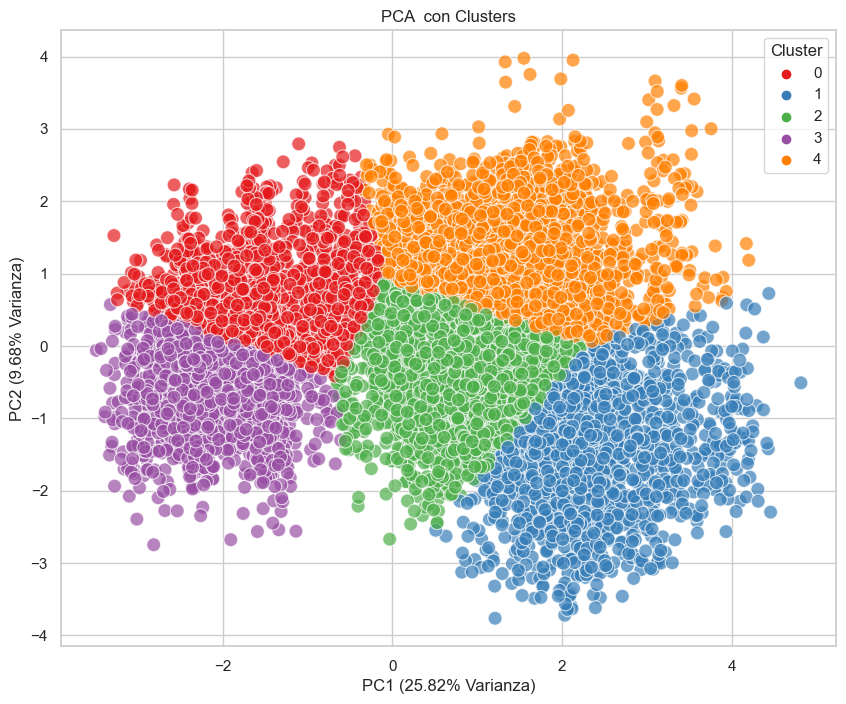

In [7]:
from sklearn.cluster import KMeans

# Determinar el número óptimo de clusters, por ejemplo, 3
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(pca_df[['PC1', 'PC2']])

# Añadir clusters al DataFrame
pca_df['Cluster'] = clusters

# Visualizar
plt.figure(figsize=(10,8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set1', s=100, alpha=0.7)
plt.title('PCA  con Clusters')
plt.xlabel(f'PC1 ({varianza_explicada[0]*100:.2f}% Varianza)')
plt.ylabel(f'PC2 ({varianza_explicada[1]*100:.2f}% Varianza)')
plt.grid(True)
plt.show()


La columna 'ID' ha sido eliminada correctamente.

Columnas numéricas: ['Unnamed: 0', 'Genero', 'Edad', 'Profesion', 'Experiencia laboral', 'Gastoscore', 'Family_Size', 'Generacion', 'Ingresos anuales brutos', 'Provincia', 'Digital_encuesta', 'Gasto_medio_mensual_cuota', 'Abandono', 'Dias_cliente']

Variables binarias (0 y 1): ['Genero', 'Abandono']

Variables numéricas continuas: ['Unnamed: 0', 'Edad', 'Profesion', 'Experiencia laboral', 'Gastoscore', 'Family_Size', 'Generacion', 'Ingresos anuales brutos', 'Provincia', 'Digital_encuesta', 'Gasto_medio_mensual_cuota', 'Dias_cliente']

Variables numéricas continuas seleccionadas para clustering: ['Unnamed: 0', 'Edad', 'Profesion', 'Experiencia laboral', 'Gastoscore', 'Family_Size', 'Generacion', 'Ingresos anuales brutos', 'Provincia', 'Digital_encuesta', 'Gasto_medio_mensual_cuota', 'Dias_cliente']

Valores faltantes por columna:
Unnamed: 0                   0
Edad                         0
Profesion                    0
Experiencia lab

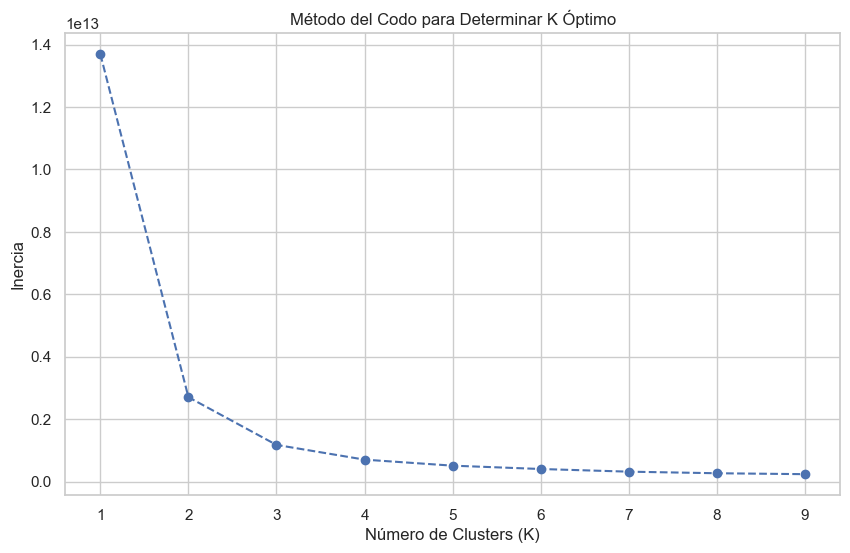

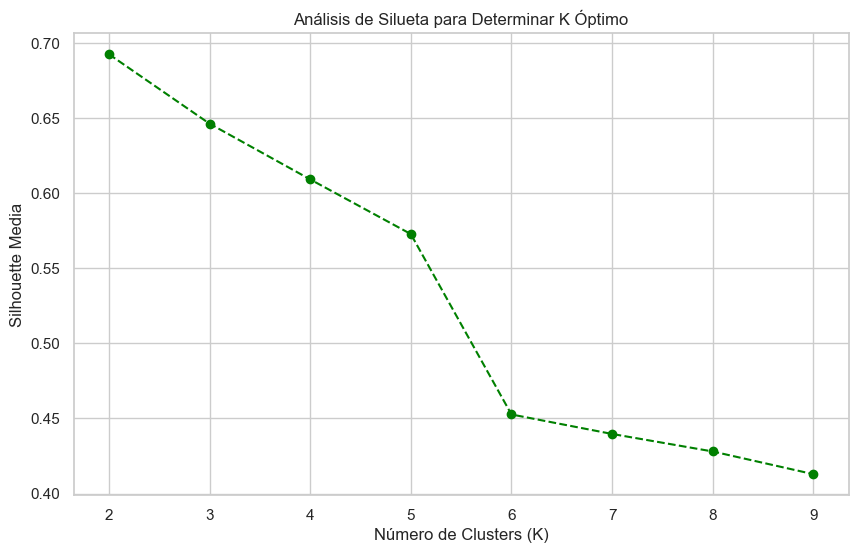


Asignación de Clusters:
   Unnamed: 0  Edad  Profesion  Experiencia laboral  Gastoscore  Family_Size  \
0           0    24          3                    2           1            4   
1           1    42          4                    0           2            3   
2           2    74          4                    0           1            1   
3           3    74          8                    0           0            2   
4           4    44          7                    0           0            6   

   Generacion  Ingresos anuales brutos  Provincia  Digital_encuesta  \
0           2                    13945         30             1.029   
1           3                   118107         37             1.790   
2           1                    53533          8             1.326   
3           1                    82273         16             0.779   
4           1                    90776          4             1.767   

   Gasto_medio_mensual_cuota  Dias_cliente  Cluster  
0            

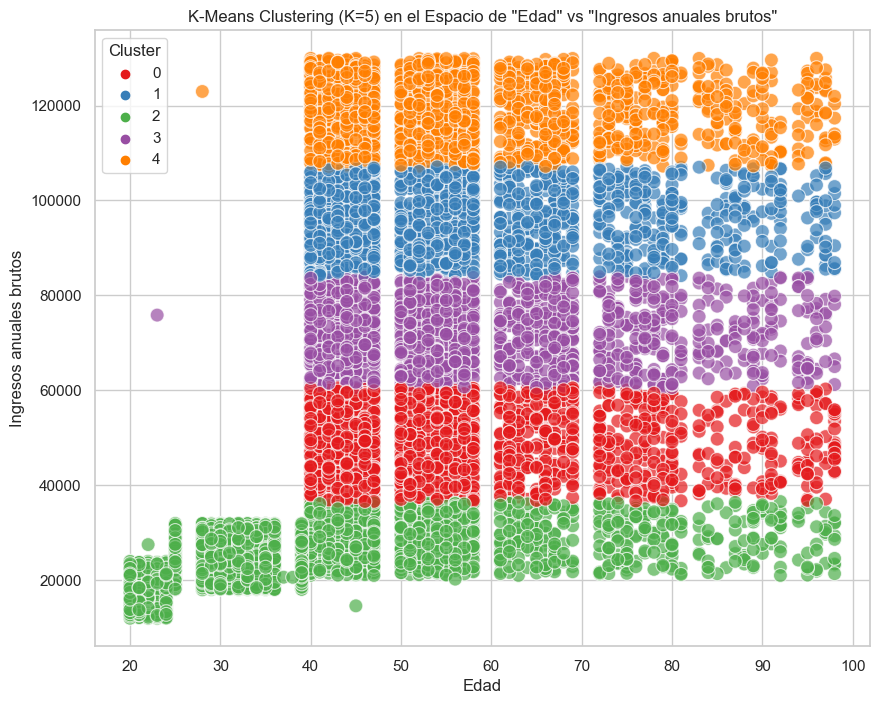

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples



# 2. Eliminar la columna 'ID' si existe
if 'ID' in df.columns:
    df = df.drop('ID', axis=1)
    print("\nLa columna 'ID' ha sido eliminada correctamente.")
else:
    print("\nLa columna 'ID' no está presente en el DataFrame.")

# 3. Identificar variables numéricas
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nColumnas numéricas:", numerical_cols)

# Identificar variables continuas y categóricas binarias
binary_cols = []
continuous_cols = []

for col in numerical_cols:
    unique_values = df[col].dropna().unique()
    if sorted(unique_values) == [0, 1]:
        binary_cols.append(col)
    else:
        continuous_cols.append(col)

print("\nVariables binarias (0 y 1):", binary_cols)
print("\nVariables numéricas continuas:", continuous_cols)

# 4. Seleccionar solo variables numéricas continuas para el clustering
df_continuous = df[continuous_cols]
print("\nVariables numéricas continuas seleccionadas para clustering:", df_continuous.columns.tolist())

# 5. Manejo de valores faltantes
print("\nValores faltantes por columna:")
print(df_continuous.isnull().sum())

# Eliminar filas con valores faltantes
df_cleaned = df_continuous.dropna()
print(f"\nNúmero de filas después de eliminar valores faltantes: {df_cleaned.shape[0]}")

# 6. Método del Codo
inercia = []
rangos_k = range(1, 10)  # Reducido para simplificar análisis

for k in rangos_k:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_cleaned)
    inercia.append(kmeans.inertia_)

# Graficar el Método del Codo
plt.figure(figsize=(10, 6))
plt.plot(rangos_k, inercia, marker='o', linestyle='--')
plt.title('Método del Codo para Determinar K Óptimo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.xticks(rangos_k)
plt.grid(True)
plt.show()

# 7. Análisis de Silueta
silhueta_media = []
rangos_k_sil = range(2, 10)

for k in rangos_k_sil:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_cleaned)
    sil_score = silhouette_score(df_cleaned, labels)
    silhueta_media.append(sil_score)

# Graficar el Análisis de Silueta
plt.figure(figsize=(10, 6))
plt.plot(rangos_k_sil, silhueta_media, marker='o', linestyle='--', color='green')
plt.title('Análisis de Silueta para Determinar K Óptimo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Silhouette Media')
plt.xticks(rangos_k_sil)
plt.grid(True)
plt.show()

# 8. Aplicar K-Means con K óptimo
k_optimo = 5  # Ajusta según los análisis del Método del Codo y Silueta
kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_cleaned)

# Añadir los labels de los clusters al DataFrame limpio
df_cleaned['Cluster'] = clusters

print("\nAsignación de Clusters:")
print(df_cleaned.head())

# 9. Visualización de Clusters
if 'Edad' in df_cleaned.columns and 'Ingresos anuales brutos' in df_cleaned.columns:
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='Edad', y='Ingresos anuales brutos', hue='Cluster', data=df_cleaned, palette='Set1', s=100, alpha=0.7)
    plt.title(f'K-Means Clustering (K={k_optimo}) en el Espacio de "Edad" vs "Ingresos anuales brutos"')
    plt.xlabel('Edad')
    plt.ylabel('Ingresos anuales brutos')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()
else:
    print("\nVariables para visualización no disponibles.")


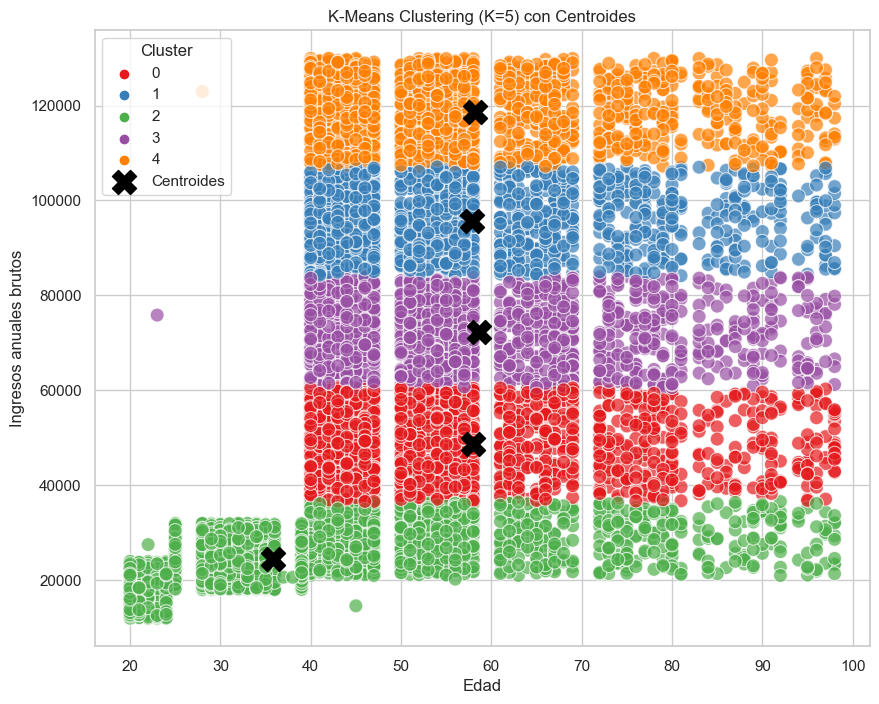

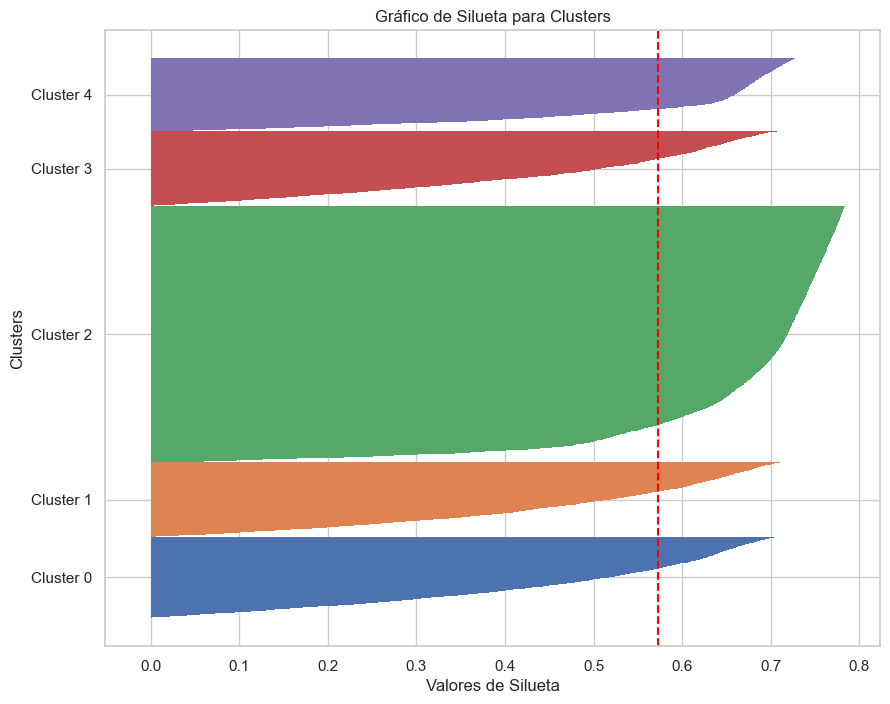

In [9]:
from sklearn.metrics import silhouette_samples

# Gráfico de Clusters con Centroides
if 'Edad' in df_cleaned.columns and 'Ingresos anuales brutos' in df_cleaned.columns:
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='Edad', y='Ingresos anuales brutos', hue='Cluster', data=df_cleaned, palette='Set1', s=100, alpha=0.7)
    # Añadir los centroides
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, continuous_cols.index('Edad')], centroids[:, continuous_cols.index('Ingresos anuales brutos')],
                s=300, c='black', marker='X', label='Centroides')
    plt.title(f'K-Means Clustering (K={k_optimo}) con Centroides')
    plt.xlabel('Edad')
    plt.ylabel('Ingresos anuales brutos')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()
else:
    print("\nVariables para visualización no disponibles.")

# Gráfico de Silueta para cada Cluster
silhouette_vals = silhouette_samples(df_cleaned.drop('Cluster', axis=1), df_cleaned['Cluster'])
y_ticks = []
y_lower, y_upper = 0, 0
plt.figure(figsize=(10, 8))

for i in range(k_optimo):
    cluster_sil_vals = silhouette_vals[df_cleaned['Cluster'] == i]
    cluster_sil_vals.sort()
    y_upper += len(cluster_sil_vals)
    plt.barh(range(y_lower, y_upper), cluster_sil_vals, edgecolor='none', height=1)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_sil_vals)

plt.axvline(x=silhouette_score(df_cleaned.drop('Cluster', axis=1), df_cleaned['Cluster']), color="red", linestyle="--")
plt.yticks(y_ticks, [f'Cluster {i}' for i in range(k_optimo)])
plt.ylabel('Clusters')
plt.xlabel('Valores de Silueta')
plt.title('Gráfico de Silueta para Clusters')
plt.grid(True)
plt.show()
